**Mini-exercice : given this model how would you deduce the doubling time (mean time it takes for the number of infected to double) ?** 

In [2]:
import numpy as np

# answer : the doubling time corresponds to the number of days d, 
# n0*exp(beta*d) = 2*n0*exp(beta*0)
# --> exp(beta*d) = 2
# --> beta*d == log(2)
doubling_time = np.log(2)/0.1128
doubling_time

6.144921813474692

# Exercise on GLM :  a dose-response problem

In the following dataset we would like to model the death rate of beetles due to some pesticide concentration.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df_beetles=pd.read_csv('beetle.csv' , index_col=0)
df_beetles

,dose,nexp,ndied,prop,nalive
1,49.1,59,6,0.102,53
2,53.0,60,13,0.217,47
3,56.9,62,18,0.290,44
4,60.8,56,28,0.500,28
5,64.8,63,52,0.825,11
6,68.7,59,53,0.898,6
7,72.6,62,61,0.984,1
8,76.5,60,60,1.000,0


Text(0, 0.5, 'Proportion of dead')

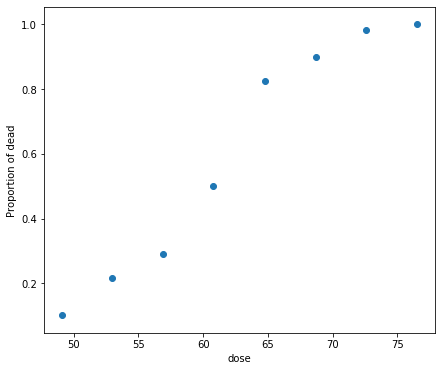

In [7]:
fig, ax = plt.subplots(ncols=1,figsize=(7,6))
ax.scatter( df_beetles["dose"], df_beetles["prop"])
ax.set_xlabel('dose')
ax.set_ylabel('Proportion of dead')

Using what You have learned, build a model of the number of dead and alive beetles 
depending on the insecticide dose.

Here is a tentative path you may follow:
1. decide on a relevant model family given the quantity you want to model
2. create and fit your model
3. inspect the results of your fitting
4. plot the predictions of your model with the observed data

**IMPORTANT NOTES**

* Here you can see that the number of bettle is not always exactly the same (from 56 to 63).
* It is possible to have several predicted variable in your model, the way you would do it is:
```
y=df_beetles[["ndied","nalive"]]
```

In [8]:
y=df_beetles[["ndied","nalive"]]
#since we want our random variable to be represented by a binomial we need two parameters
#to define a binomial.

X = df_beetles["dose"]
X = sm.add_constant(X)
model = sm.GLM(y, X,family=sm.families.Binomial())
results = model.fit()

print( results.summary() )

                  Generalized Linear Model Regression Results                  
Dep. Variable:     ['ndied', 'nalive']   No. Observations:                    8
Model:                             GLM   Df Residuals:                        6
Model Family:                 Binomial   Df Model:                            1
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -16.791
Date:                 Tue, 08 Dec 2020   Deviance:                       7.3849
Time:                         09:43:16   Pearson chi2:                     6.52
No. Iterations:                      6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.8230      1.290    -11.49

/home/wandrille/Installed_software/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


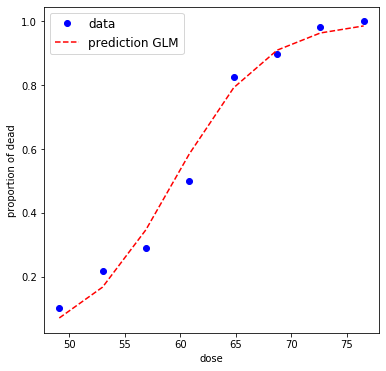

In [9]:
predictedProportionOfDead =  results.mu 
# equivalent to : 1./(1+np.exp(-(-14.8230+0.2494*df_beetles["dose"]))) 

fig, ax = plt.subplots(ncols=1,figsize=(6,6))
ax.plot(df_beetles["dose"] , df_beetles["prop"] ,'bo',label='data')
ax.plot(df_beetles["dose"], predictedProportionOfDead,'r--',label='prediction GLM')

ax.set_xlabel('dose')
ax.set_ylabel('proportion of dead')
ax.legend(loc='best',fontsize=12)